<a href="https://colab.research.google.com/github/IsaiasGabrielDev/ModelTreeDecisionPrognosis/blob/main/ModeloTreeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/Training.csv")




In [77]:
X = data.drop("prognosis", axis=1)
X = np.nan_to_num(X) 
c = data['prognosis']

le = LabelEncoder()

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Populating the interactive namespace from numpy and matplotlib


[Text(0.9714285714285714, 0.9916666666666667, 'slurred_speech <= 0.5\ngini = 0.976\nsamples = 3936\nvalue = [102, 98, 89, 96, 97, 97, 92, 93, 99, 99, 86, 102\n98, 93, 93, 96, 93, 94, 88, 101, 103, 92, 98\n100, 97, 107, 97, 95, 94, 95, 91, 97, 90, 96, 97\n102, 96, 95, 100, 92, 96]'),
 Text(0.9571428571428572, 0.975, 'pain_behind_the_eyes <= 0.5\ngini = 0.975\nsamples = 3829\nvalue = [102, 98, 89, 96, 97, 97, 92, 93, 99, 99, 86, 102\n98, 93, 93, 96, 93, 94, 88, 101, 103, 92, 98\n100, 97, 0, 97, 95, 94, 95, 91, 97, 90, 96, 97\n102, 96, 95, 100, 92, 96]'),
 Text(0.9428571428571428, 0.9583333333333334, 'receiving_unsterile_injections <= 0.5\ngini = 0.974\nsamples = 3727\nvalue = [102, 98, 89, 96, 97, 97, 92, 93, 99, 99, 86, 0\n98, 93, 93, 96, 93, 94, 88, 101, 103, 92, 98\n100, 97, 0, 97, 95, 94, 95, 91, 97, 90, 96, 97\n102, 96, 95, 100, 92, 96]'),
 Text(0.9285714285714286, 0.9416666666666667, 'red_spots_over_body <= 0.5\ngini = 0.974\nsamples = 3626\nvalue = [102, 98, 89, 96, 97, 97, 92, 93

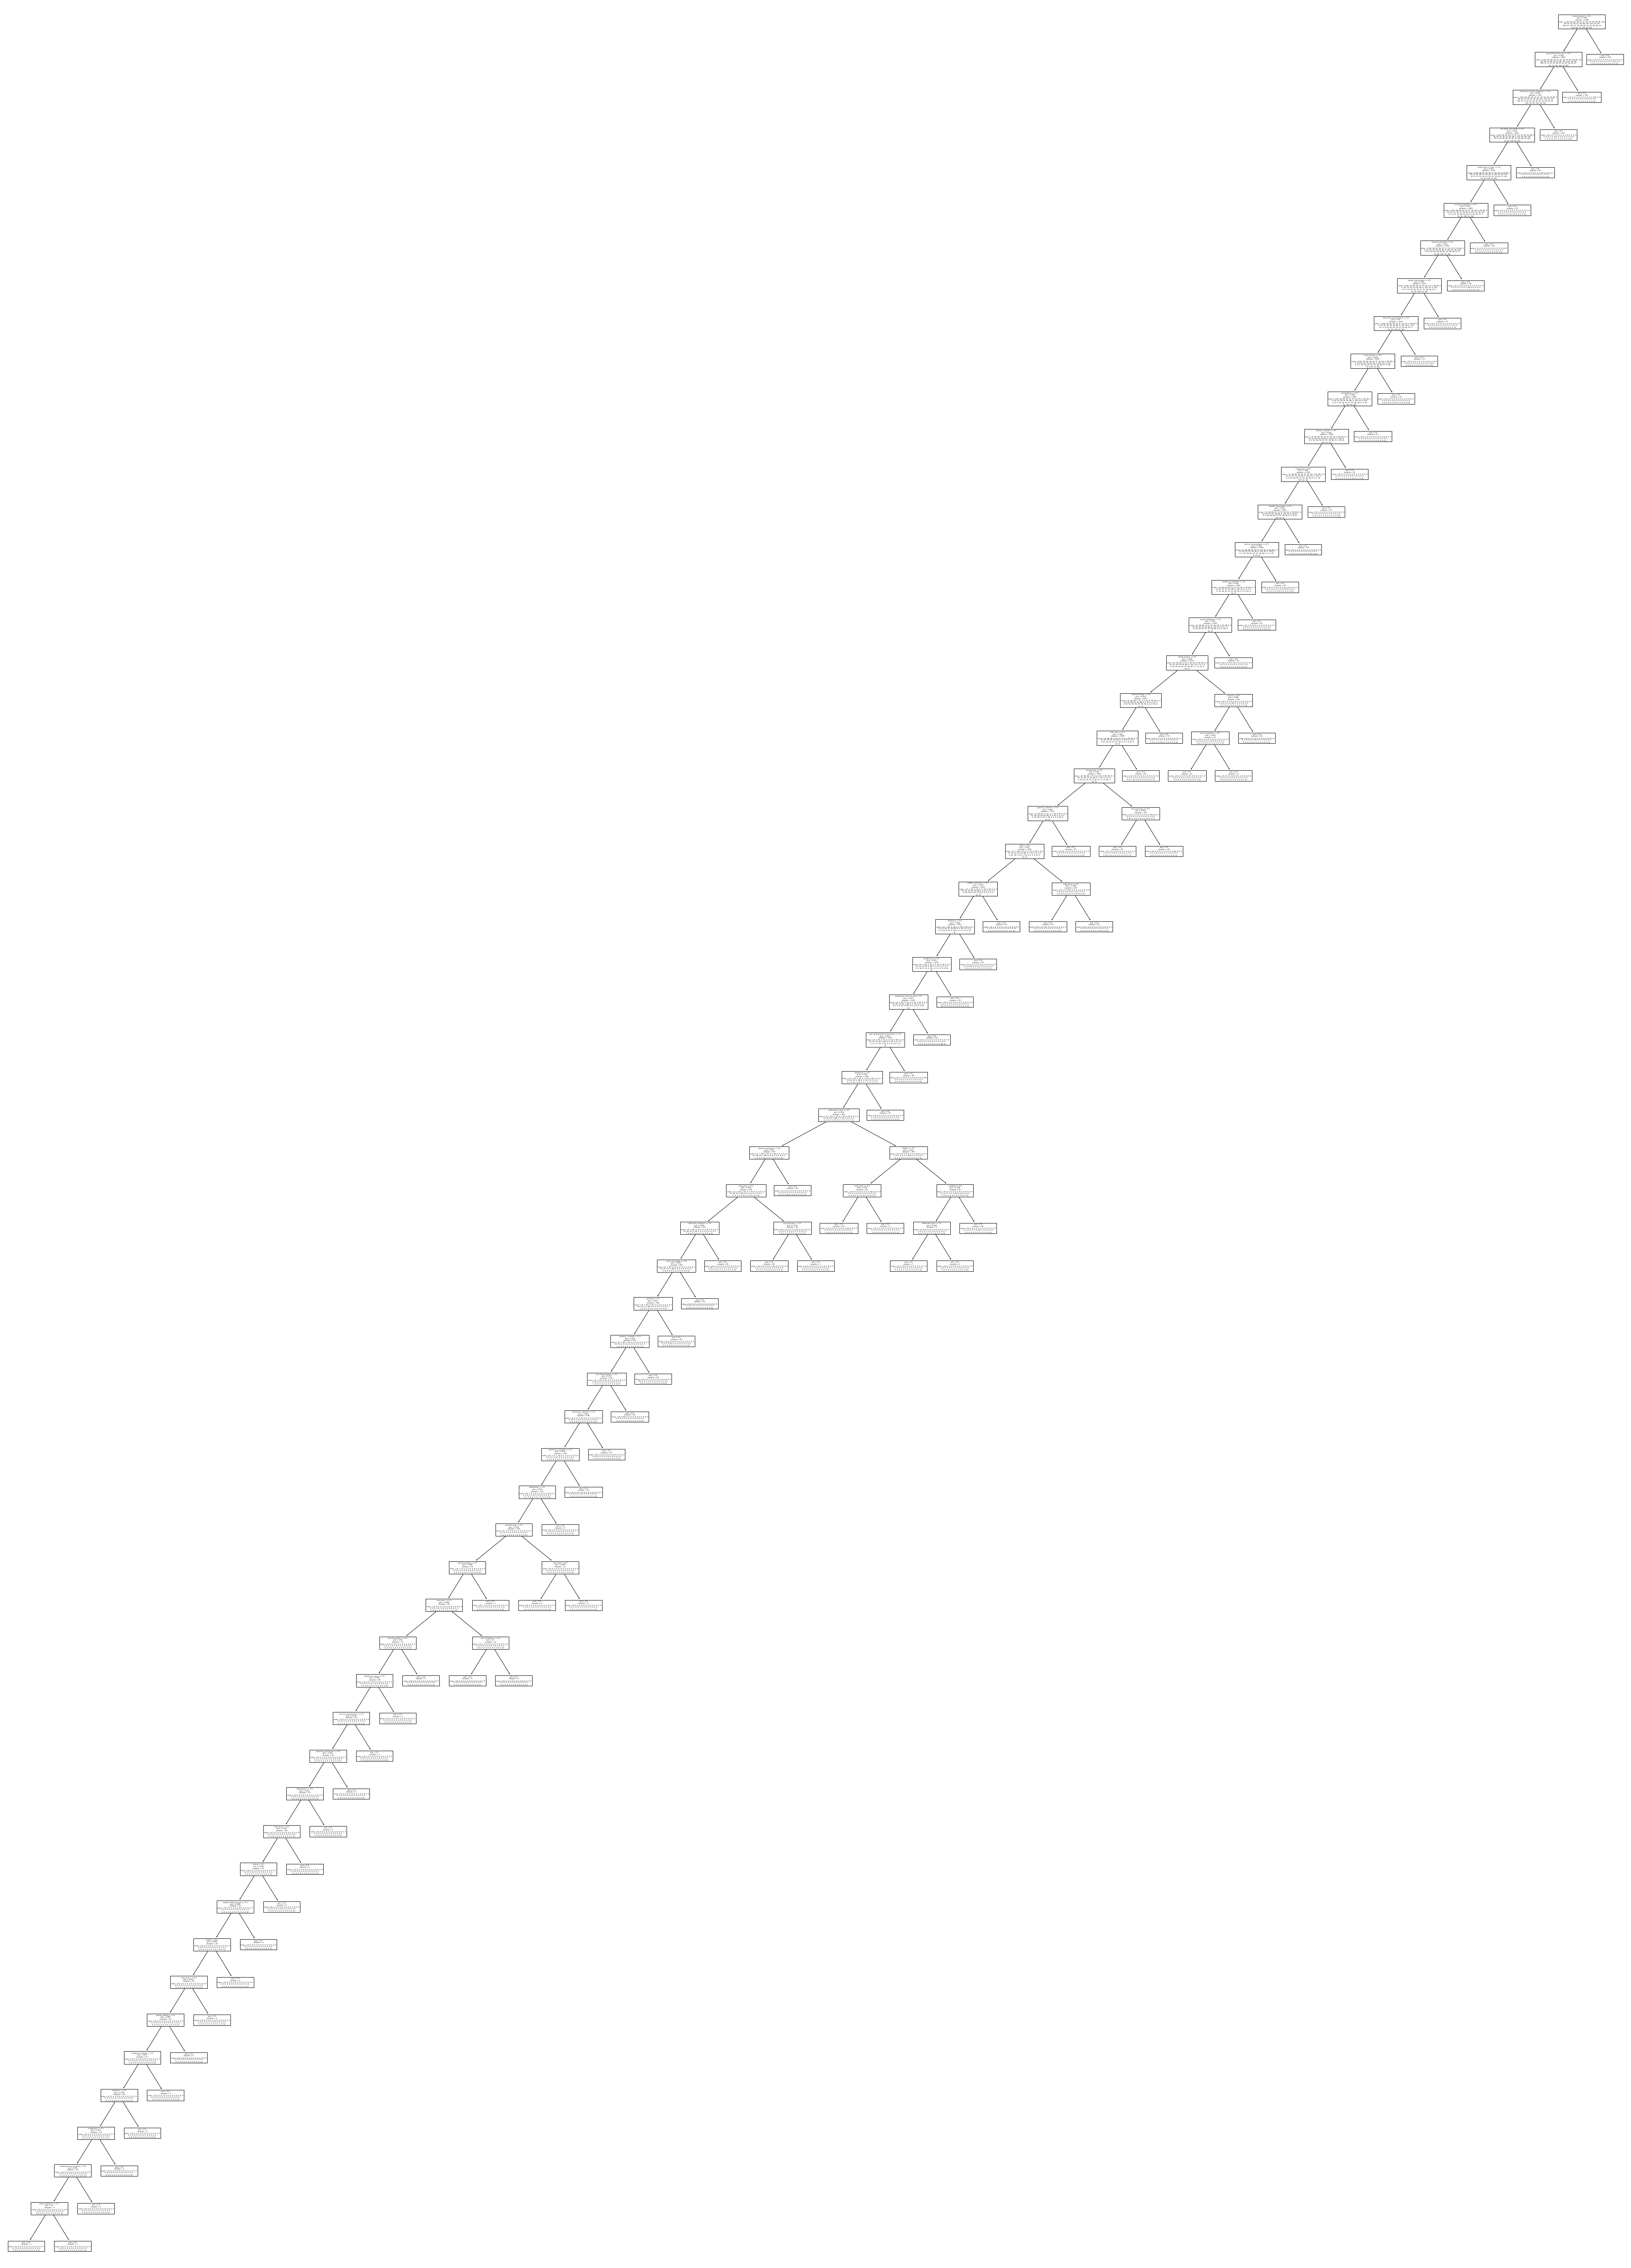

In [78]:
%pylab inline
pylab.figure(figsize=(70,100))
plot_tree(model, feature_names=data.drop("prognosis", axis=1).columns)

In [79]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
#@title Texto de título padrão
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
#dt_target_names = [str(s) for s in y.unique()]
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = data.drop("prognosis", axis=1).columns,
                class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
